### House Price Prediction

#### load liabraries

In [10]:
import numpy as np
from matplotlib import pyplot as plt

#### Load DataSet

In [11]:
# Features: [Size (sqft), Number of bedrooms]
X = np.array([
    [850, 2],
    [900, 2],
    [1000, 3],
    [1200, 3],
    [1400, 4]
])

# Target price in $1000s
y = np.array([75, 80, 100, 120, 150])

#### predict the model 

In [12]:
def predict_mode(x, w, b):
    return np.dot(x, w) + b

#### find the cost error function 

In [13]:
def cost_error_function(x, y, w, b):
    m = x.shape[0] #no of example || training data set number
    predictions = predict_mode(x, w, b)
    error = predictions - y
    cost = (1 / (2 * m)) * np.sum(error ** 2)
    return cost

#### Gradient Decenst Computations

In [14]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    prediction = predict_mode(x, w, b)
    error = prediction - y
    dj_dw = (1 / m) * (x.T @ error)
    dj_db = (1/m) * np.sum(error)
    return dj_dw, dj_db

#### Gradient Decent

In [15]:
def gradient_descent(x, y, w_init, b_init, iter, alpha):
    w = w_init.copy()
    b = b_init
    cost_history = []
    
    for i in range(iter):
        dj_dw, dj_db = compute_gradient(x, y, w, b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i % 100 == 0 or i == iter - 1:
            cost = cost_error_function(x, y, w, b)
            cost_history.append(cost)
            print(f"iterations {i} : cost = {cost:.4f}, w = {w}, b = {b:.4f}")
    
    return w, b, cost_history


#### Testing the model

In [16]:
# Features: [Size (sqft), Number of bedrooms]
X = np.array([
    [850, 2],
    [900, 2],
    [1000, 3],
    [1200, 3],
    [1400, 4]
])

mu = np.mean(X, axis=0)
sigma = np.std(X, axis=0)
X_scaled = (X - mu) / sigma


# Target price in $1000s
y = np.array([75, 80, 100, 120, 150])
w_init = np.zeros(X.shape[1])
b_init = 0
alpha = 1e-7
iteration = 1000

w_final, b_final, cost_hist = gradient_descent(X, y, w_init, b_init, iteration, alpha)

# Predict with scaled inputs
predictions = predict_mode(X, w_final, b_final)

iterations 0 : cost = 4583.8042, w = [1.1795e-02 3.1400e-05], b = 0.0000
iterations 100 : cost = 29.7931, w = [0.09940893 0.00028179], b = 0.0001
iterations 200 : cost = 29.7930, w = [0.09940918 0.00030032], b = 0.0001
iterations 300 : cost = 29.7930, w = [0.09940915 0.00031884], b = 0.0000
iterations 400 : cost = 29.7929, w = [0.09940911 0.00033736], b = 0.0000
iterations 500 : cost = 29.7929, w = [0.09940907 0.00035589], b = 0.0000
iterations 600 : cost = 29.7928, w = [0.09940904 0.00037441], b = 0.0000
iterations 700 : cost = 29.7928, w = [0.099409   0.00039294], b = -0.0000
iterations 800 : cost = 29.7927, w = [0.09940896 0.00041146], b = -0.0000
iterations 900 : cost = 29.7927, w = [0.09940893 0.00042999], b = -0.0000
iterations 999 : cost = 29.7926, w = [0.09940889 0.00044833], b = -0.0000


#### graph

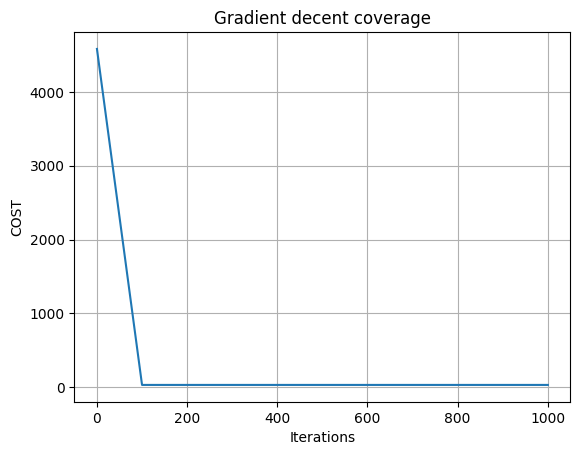

In [17]:
plt.plot(range(0, len(cost_hist) * 100, 100), cost_hist)
plt.xlabel("Iterations")
plt.ylabel("COST")
plt.title("Gradient decent coverage")
plt.grid(True)
plt.show()

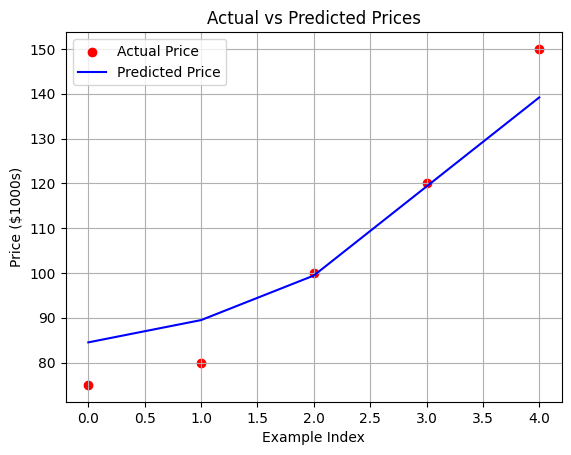

In [18]:
predictions = predict_mode(X, w_final, b_final)

plt.scatter(range(len(y)), y, color='red', label='Actual Price')
plt.plot(range(len(predictions)), predictions, color='blue', label='Predicted Price')
plt.xlabel("Example Index")
plt.ylabel("Price ($1000s)")
plt.legend()
plt.title("Actual vs Predicted Prices")
plt.grid(True)
plt.show()
